## Final Project Submission

* Student name: Emily Marsh
* Student pace: Flex
* Scheduled project review date/time: 
* Instructor name: Joe Comeaux

## Introduction

Henbart LLC, a real estate developer in the Seattle area, has purchased undeveloped property outside of the Seattle metropolitan area. They are responding to the pandemic-era trend where there has been more demand for single-family homes, however with inflation they want to make sure to build houses that will maximize their ROI. The statistical analysis of the Kings County Dataset will show which features maximize profit and will inform the type of homes and properties Henbart LLC will build on this property. 

## Content Exploration

Re-sell value of the house will be determined by price and statistical analysis will focus on property features that maximize this price. Analysis will focus on the features provided in the King County House Sales dataset.

In [1]:
#importing cleaning, statistical analysis, and data visualization programs

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy import stats
from sklearn import preprocessing
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_squared_error
import pylab

import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np
%matplotlib inline

[(0.9155979, 0.55210684, 0.42070204), (0.888292, 0.40830288, 0.36223756), (0.81942908, 0.28911553, 0.38102921), (0.69226314, 0.23413578, 0.42480327), (0.56041794, 0.19845221, 0.44207535), (0.42355299, 0.16934709, 0.42581586)]


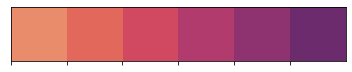

In [2]:
#creating a consistent color palatte for visualizations
pal = sns.color_palette("flare")
print(pal)
sns.palplot(pal)

## Dataset Exploration and Preparation

Importing the King County House Sales dataset and preparing the dataset for statistical analysis and modeling

In [3]:
#using CSV reader to read dataframe into pandas
df = pd.read_csv("data/kc_house_data.csv")

In [4]:
#overview of features available in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Summary of mean, quartiles, and std in the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the summary of the data set there are some details of interest given about the features. There are fifteen features with 21597 entries. There is also some interesting information given about the quartiles and possible outliers. 

In [6]:
# Dropping columns that are irrelevant to analysis of the data

In [7]:
df = df.drop(['date','view', 'sqft_above', 'sqft_basement', 'waterfront','zipcode','lat','long', 'sqft_living15','sqft_lot15','id'], axis=1)

In order to focus in on features that are the most relevent to the analysis, the following columns (above) were dropped. The locations where single family homes are to be developed have already been purchased, so the features pertaining to location are irrelevant. These included zipcode, lat, long, waterfront, and view. Identifying features are also irrelevant to the analysis (date, id) and to avoid multicollinearity similar columns were dropped leaving only one to summarize the feature. These included sqft_above, sqft_basement, sqft_living15, and sqft_above.

In [8]:
#dataframe head after columns have been dropped
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,1951,1991.0
2,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,1933,NaN
3,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1987,0.0
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,Average,8 Good,2009,0.0
21593,400000.0,4,2.50,2310,5813,2.0,Average,8 Good,2014,0.0
21594,402101.0,2,0.75,1020,1350,2.0,Average,7 Average,2009,0.0
21595,400000.0,3,2.50,1600,2388,2.0,Average,8 Good,2004,0.0


In [9]:
# Exploring yr_renovated

df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

The year the house is renovated is not as important to the analysis as whether it was renovated. Using boolean features will change this column to be either a True value for renovated or False for not renovated. 

In [10]:
#Adding a boolean feature to this column

conditions = [df.loc[:,'yr_renovated'] > 0,
              df.loc[:,'yr_renovated'] == 0]

values = [1,0]

df.loc[:,'is_renovated'] = np.select(conditions, values, default=0)

df['is_renovated'].value_counts()

0    20853
1      744
Name: is_renovated, dtype: int64

In [11]:
# Dropping the yr_renovated column

df = df.drop('yr_renovated', axis = 1)

The last column that needs to be adjusted is the yr_built. In order to use the information provided in this column more effectively, a new column will be created with the age of the building. 

In [12]:
#create new column age_in_yr with current year minus year built
df.loc[:,'age_in_yr'] = (
    (2022-df['yr_built'])
    )
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,is_renovated,age_in_yr
0,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1955,0,67
1,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,1951,1,71
2,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,1933,0,89
3,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1965,0,57
4,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1987,0,35


In [13]:
#drop yr_built column

df = df.drop('yr_built', axis = 1)

## Categorical Variables

In order to create a linear regression model, the categorical features in the dataset need to be prepared. 

In [14]:
#Checking dataset for column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   sqft_lot      21597 non-null  int64  
 5   floors        21597 non-null  float64
 6   condition     21597 non-null  object 
 7   grade         21597 non-null  object 
 8   is_renovated  21597 non-null  int64  
 9   age_in_yr     21597 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.6+ MB


The two categorical features in this data set are condition and grade.

In [15]:
#exploring value types for condition column
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [16]:
#create changes the datatype of a variable to a niche categorical datatype
df['condition'] = pd.Categorical(df['condition'], ['Poor', 'Fair', 'Average', 'Good', 'Very Good'], ordered=True)

#assigning categorical datatype values to condition column
df['condition'] = df['condition'].cat.codes


In [17]:
#check new values for condition column
df['condition'].value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: condition, dtype: int64

In [18]:
#exploring value types for grade column
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [19]:
#create changes the datatype of a variable to a niche categorical datatype
df['grade'] = pd.Categorical(df['grade'], ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good','11 Excellent','12 Luxury', '13 Mansion'], ordered=True)

#assigning categorical datatype values to condition column
df['grade'] = df['grade'].cat.codes

In [20]:
#check new values of grade column
df['grade'].value_counts()

4     8974
5     6065
6     2615
3     2038
7     1134
8      399
2      242
9       89
1       27
10      13
0        1
Name: grade, dtype: int64

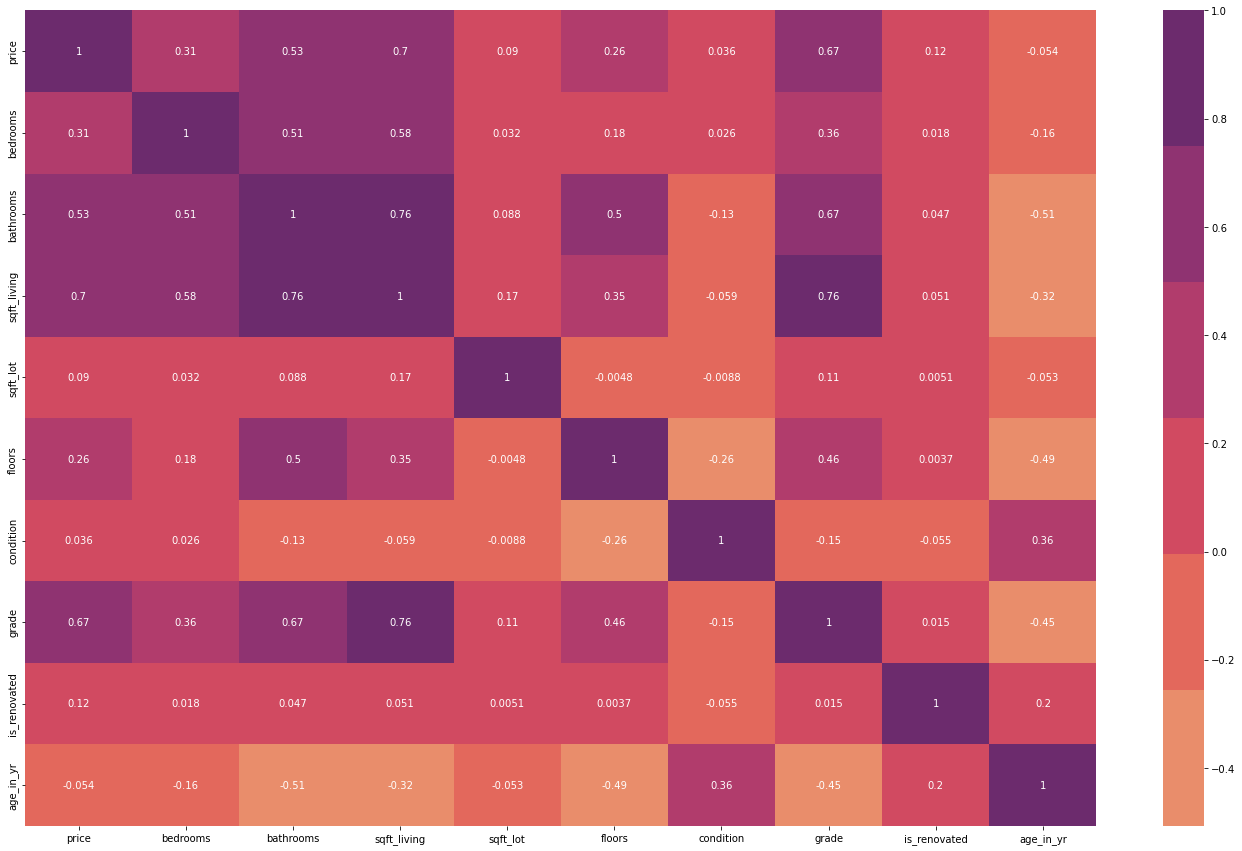

In [21]:
# Early correlation matrix to understand relationships within the features that are being analyzed

plt.figure(figsize= (24,15))
corrM = df.corr()

sns.heatmap(corrM, annot = True, cmap=pal)
plt.show()


Looking at the correlation matrix the strongest correlations between the dependent variable of price and the features appear to be sqft_living, grade, and bathrooms. There also seems to be some strong correlations between features that may require additional investigation. 

## Initial Exploratory Data Analysis of Features

Before implementing statisical analysis on the dataset, additional exploration of the data of each feature is necessary to determine the quality of the data in the dataset. 

In [22]:
# Examine initial distribution of features

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,is_renovated,age_in_yr
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,2.409825,4.657915,0.034449,51.000324
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,0.182384,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,7.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,2.000000,4.000000,0.000000,25.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,2.000000,4.000000,0.000000,47.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,3.000000,5.000000,0.000000,71.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,10.000000,1.000000,122.000000


Overall the average price of 540k compared to the median price of 450k indicated outliers in the data. The feature of bedrooms and bathrooms also indicates this with a max of 33 and 8 respectively, both significantly higher then the 75 quartile of the values. This is also reflected in sqft_lot and floors. 

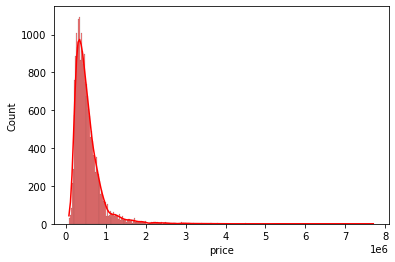

In [23]:
#distribution of the depedent variable price

sns.histplot(data=df, x='price', kde=True, color='red');

The distribution of values for price seem to be right skewed which can be indicative of outliers. Transformation of the dependent value as a log value may be a possible solution. 

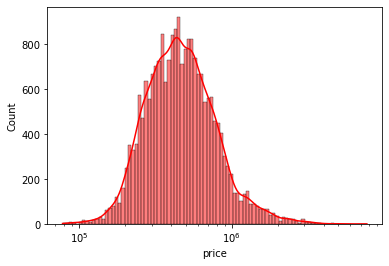

In [24]:
sns.histplot(data=df, x='price', kde=True, log_scale=True, color='red');

The skew of the distribution of the dependent variable seems to have been greatly helped by using the log value. This will be helpful later in statistical analysis of the dataset. 

## Exploration of Outliers

Since the summary revealed the possiblity of significant outliers in the dataset, using a boxplot will help create a more detailed visual. 

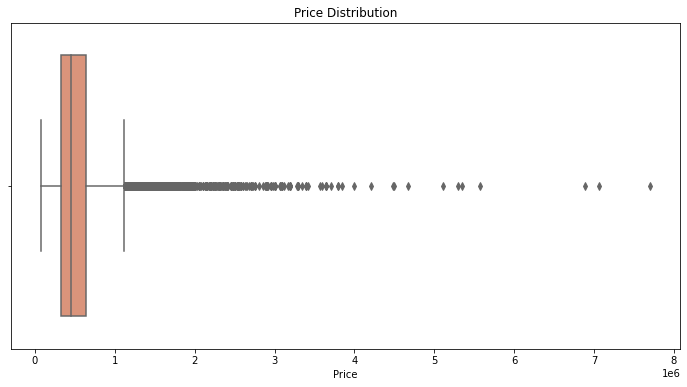

In [25]:
#creating a boxplot of price distribution
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Price Distribution')


bp = sns.boxplot(data=df, 
            x='price',  
            palette=pal)

bp.set_xlabel('Price');

The boxplot confirms the prescence of extreme outliers in the data. Doing a more indepth look at the features of Bathroom, Bedrooms, Floors, and Sqft_lot to explore further.

''

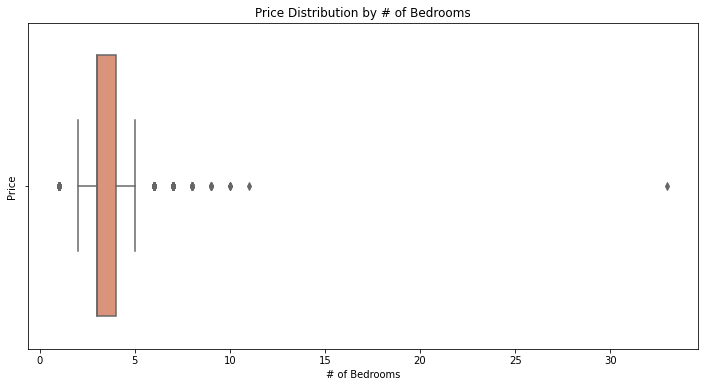

In [26]:
# Boxplot of bedrooms distribution
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Price Distribution by # of Bedrooms')


bp = sns.boxplot(data=df, 
            x='bedrooms', 
            palette=pal)

bp.set_ylabel('Price')
bp.set_xlabel('# of Bedrooms')
;

''

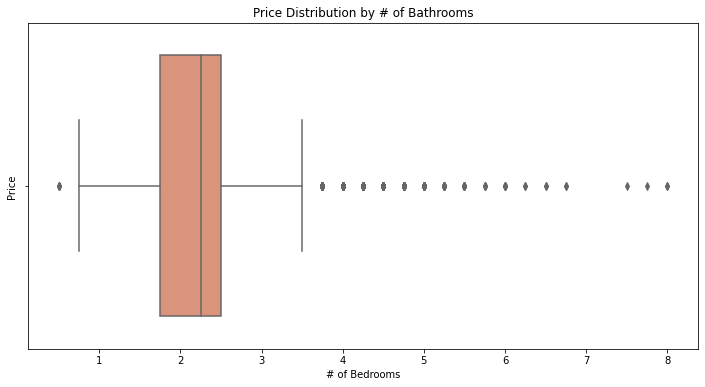

In [27]:
# Boxplot of bathroom distribution
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Price Distribution by # of Bathrooms')


bp = sns.boxplot(data=df, 
            x='bathrooms', 
            palette=pal)

bp.set_ylabel('Price')
bp.set_xlabel('# of Bedrooms')
;

''

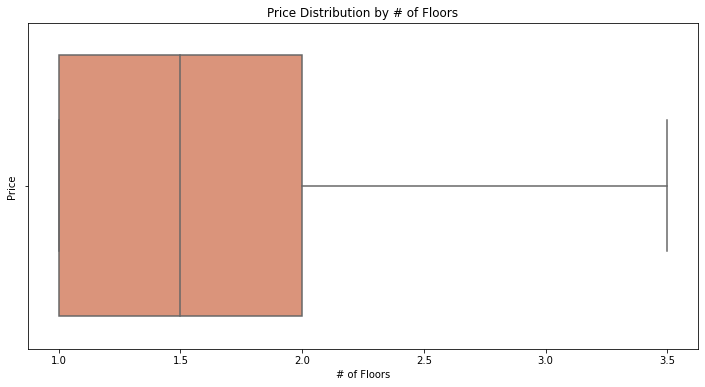

In [28]:
# Boxplot of floor distribution
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Price Distribution by # of Floors')


bp = sns.boxplot(data=df, 
            x='floors', 
            palette=pal)

bp.set_ylabel('Price')
bp.set_xlabel('# of Floors')
;

''

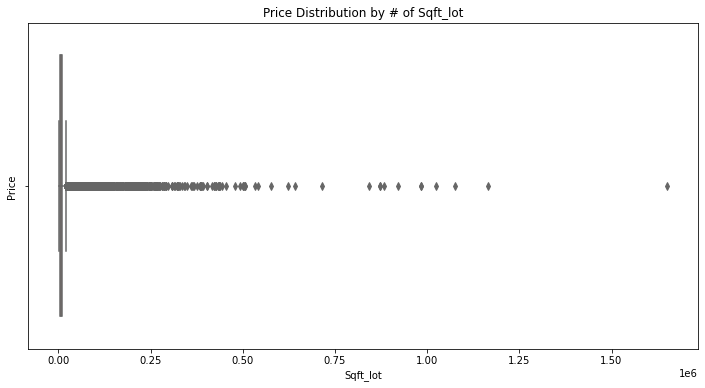

In [29]:
# Boxplot of sqft_lot distribution
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Price Distribution by # of Sqft_lot')


bp = sns.boxplot(data=df, 
            x='sqft_lot', 
            palette=pal)

bp.set_ylabel('Price')
bp.set_xlabel('Sqft_lot')
;

Using the boxplots, the main features with the most outliers are bedrooms, bathrooms, and sqft_lot. There is an extreme value for all three, specifically looking into this entry will be my next step to determine whether it should be eliminated. 

In [30]:
# isolating the bedroom row with 33 bedrooms for further inspection

df.loc[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,is_renovated,age_in_yr
15856,640000.0,33,1.75,1620,6000,1.0,4,4,0,75


In [31]:
# isolating the bathroom row with 8 bathrooms for further inspection

df.loc[df['bathrooms'] == 8]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,is_renovated,age_in_yr
7245,7700000.0,6,8.0,12050,27600,2.5,3,10,1,112
12764,2280000.0,7,8.0,13540,307752,3.0,2,9,0,23


In [32]:
# isolating the sqft_lot row with the max value for further inspection

maxval = df['sqft_lot'].max()

df.loc[df['sqft_lot'] == maxval]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,is_renovated,age_in_yr
1717,700000.0,4,1.0,1300,1651359,1.0,3,3,0,102


After exploration the only outlier that seems obviously incorrect was the bedroom outlier. This entry had 33 bedrooms and 1.75 bathrooms which seems highly unlikely. It seems more likely that this outlier was due to a mis entry of 33 instead of 3. 

In [33]:
# replacing 33 bedroom value with 3 bedrooms

df['bedrooms'] = df['bedrooms'].replace([33],3)

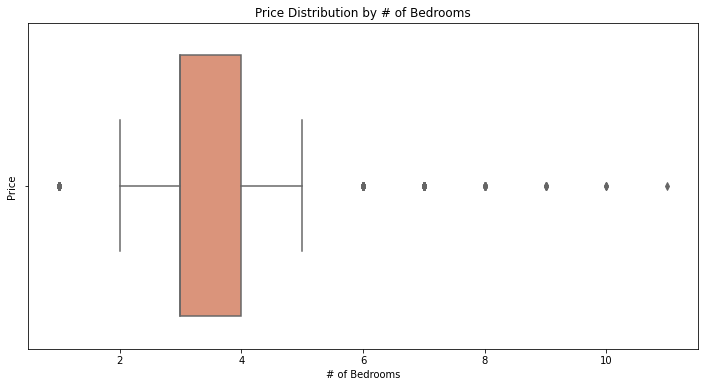

In [34]:
# check the distribution without this outlier value

fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Price Distribution by # of Bedrooms')


bp = sns.boxplot(data=df, 
            x='bedrooms', 
            palette=pal)

bp.set_ylabel('Price')
bp.set_xlabel('# of Bedrooms');

The new distribution of the bedroom values seem a lot more consistent. It also keeps bedrooms as a feature from becoming over inflated in terms of its influence on the dependent variable price. The other outliers will remain in the data and after running the model it will be determined if dropping them or keeping them will help the accuracy of the linear regression model. 

## StatsModels Multiple Linear Regression

## Model One

Now that the data has been adquately prepared, statistical analysis tools can now be implemented

In [35]:
# create predictors
predictors = df.drop(['price'], axis=1)

# create model intercept
predictors_int = sm.add_constant(predictors)

# fit model to data
model = sm.OLS(df['price'],predictors_int).fit()

# Coefficents

Using the coefficent values will help determine if there is a positive or negative relationship between the features and the dependent variable which in this case is price. 

In [36]:
#coefficents for model
model.params

const          -670906.060713
bedrooms        -53350.753041
bathrooms        51962.920519
sqft_living        190.185300
sqft_lot            -0.253445
floors           20318.479153
condition        21624.471217
grade           130153.304724
is_renovated     46803.630687
age_in_yr         3901.987089
dtype: float64

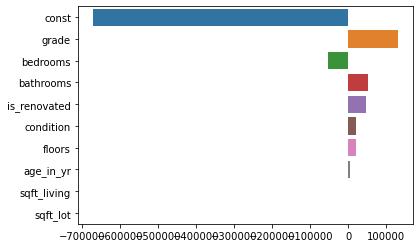

In [37]:
#creating tornadoe diagram of coefficent values
coeff = model.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');

The coefficent values show that every feature has a positive effect on price except for bedrooms. This will be explored further in the model summary. 

## Model One Summary

In [38]:
#view results of model one
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     3903.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:54:36   Log-Likelihood:            -2.9696e+05
No. Observations:               21597   AIC:                         5.939e+05
Df Residuals:                   21587   BIC:                         5.940e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.709e+05   1.28e+04    -52.576      0.000   -6.96e+05   -6.46e+05
bedrooms     -5.335e+04   2207.252    -24.171      0.000   -5.77e+04    -4.9e+04
bathrooms     5.196e+04   3613.697     14.379      0.000    4.49e+04     5.9e+04
sqft_living    190.1853      3.434     55.385      0.000     183.455     196.916
sqft_lot        -0.2534      0.038     -6.646      0.000      -0.328      -0.179
floors        2.032e+04   3588.857      5.662      0.000    1.33e+04    2.74e+04
condition     2.162e+04   2606.994      8.295      0.000    1.65e+04    2.67e+04
grade         1.302e+05   2237.394     58.172      0.000    1.26e+05    1.35e+05
is_renovated   4.68e+04   8902.423      5.257      0.000    2.94e+04    6.43e+04
age_in_yr     3901.9871     72.349     53.933      0.000    3760.178    4043.796
==============================================================================
Omnibus:                    17149.963   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1173452.343
Skew:                           3.312   Prob(JB):                         0.00
Kurtosis:                      38.498   Cond. No.                     3.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The summary of the fit model gives some insight into the fit of the model. First is the R-squared value which shows us that 61.9% of the variation is explained by the model. The F statistic of the model is 3903 and the probability of the F statistic is zero which allows us to reject the null hypothesis that the interecept only model provides a better fit then the independent variables. The T values for the independent variables are all zero so therefore we can also use this to say with confidence that we can reject the null hypothesis as well. As of now the features with largest coefficent values are grade, bathrooms, is_renovated, condition, and floors. The last important peice of information provided by the summary is that the model has significant skew and kurtosis.

## Mean Absolute Error
Mean Absolute Error(MAE) represents the average error of the model. This will help with determining the accuracy of the models results.

In [39]:
# return residuals from model
residuals = model.resid
# view residuals
residuals

0        -67705.064174
1       -163242.855373
2        -39567.768023
3        111081.502597
4         68665.519546
             ...      
21592    -35342.579837
21593    -49321.315214
21594    291864.569576
21595     -7528.426329
21596    210792.138458
Length: 21597, dtype: float64

In [40]:
# return predicted values from model
y_pred = model.fittedvalues
# view predicted values
y_pred

0        289605.064174
1        701242.855373
2        219567.768023
3        492918.497403
4        441334.480454
             ...      
21592    395342.579837
21593    449321.315214
21594    110236.430424
21595    407528.426329
21596    114207.861542
Length: 21597, dtype: float64

In [41]:
# true y value
y = df["price"]

In [42]:
# return mean absolute error of model
mae_resid = np.mean(np.abs(y - y_pred))
# view residuals from model
mae_resid

145068.2038168714

The MAE informs us that on average, our model has an error of 145068 USD when predicting the price of a house.

## Assumptions of Linear Regression
Making sure the model fufills the assumptions of linear regression will determine how trustworthy the results are in our statistical analysis

# Linearity
Using pair plots will be helpful in determining if there is a linear relationship between the depedent and independent variables

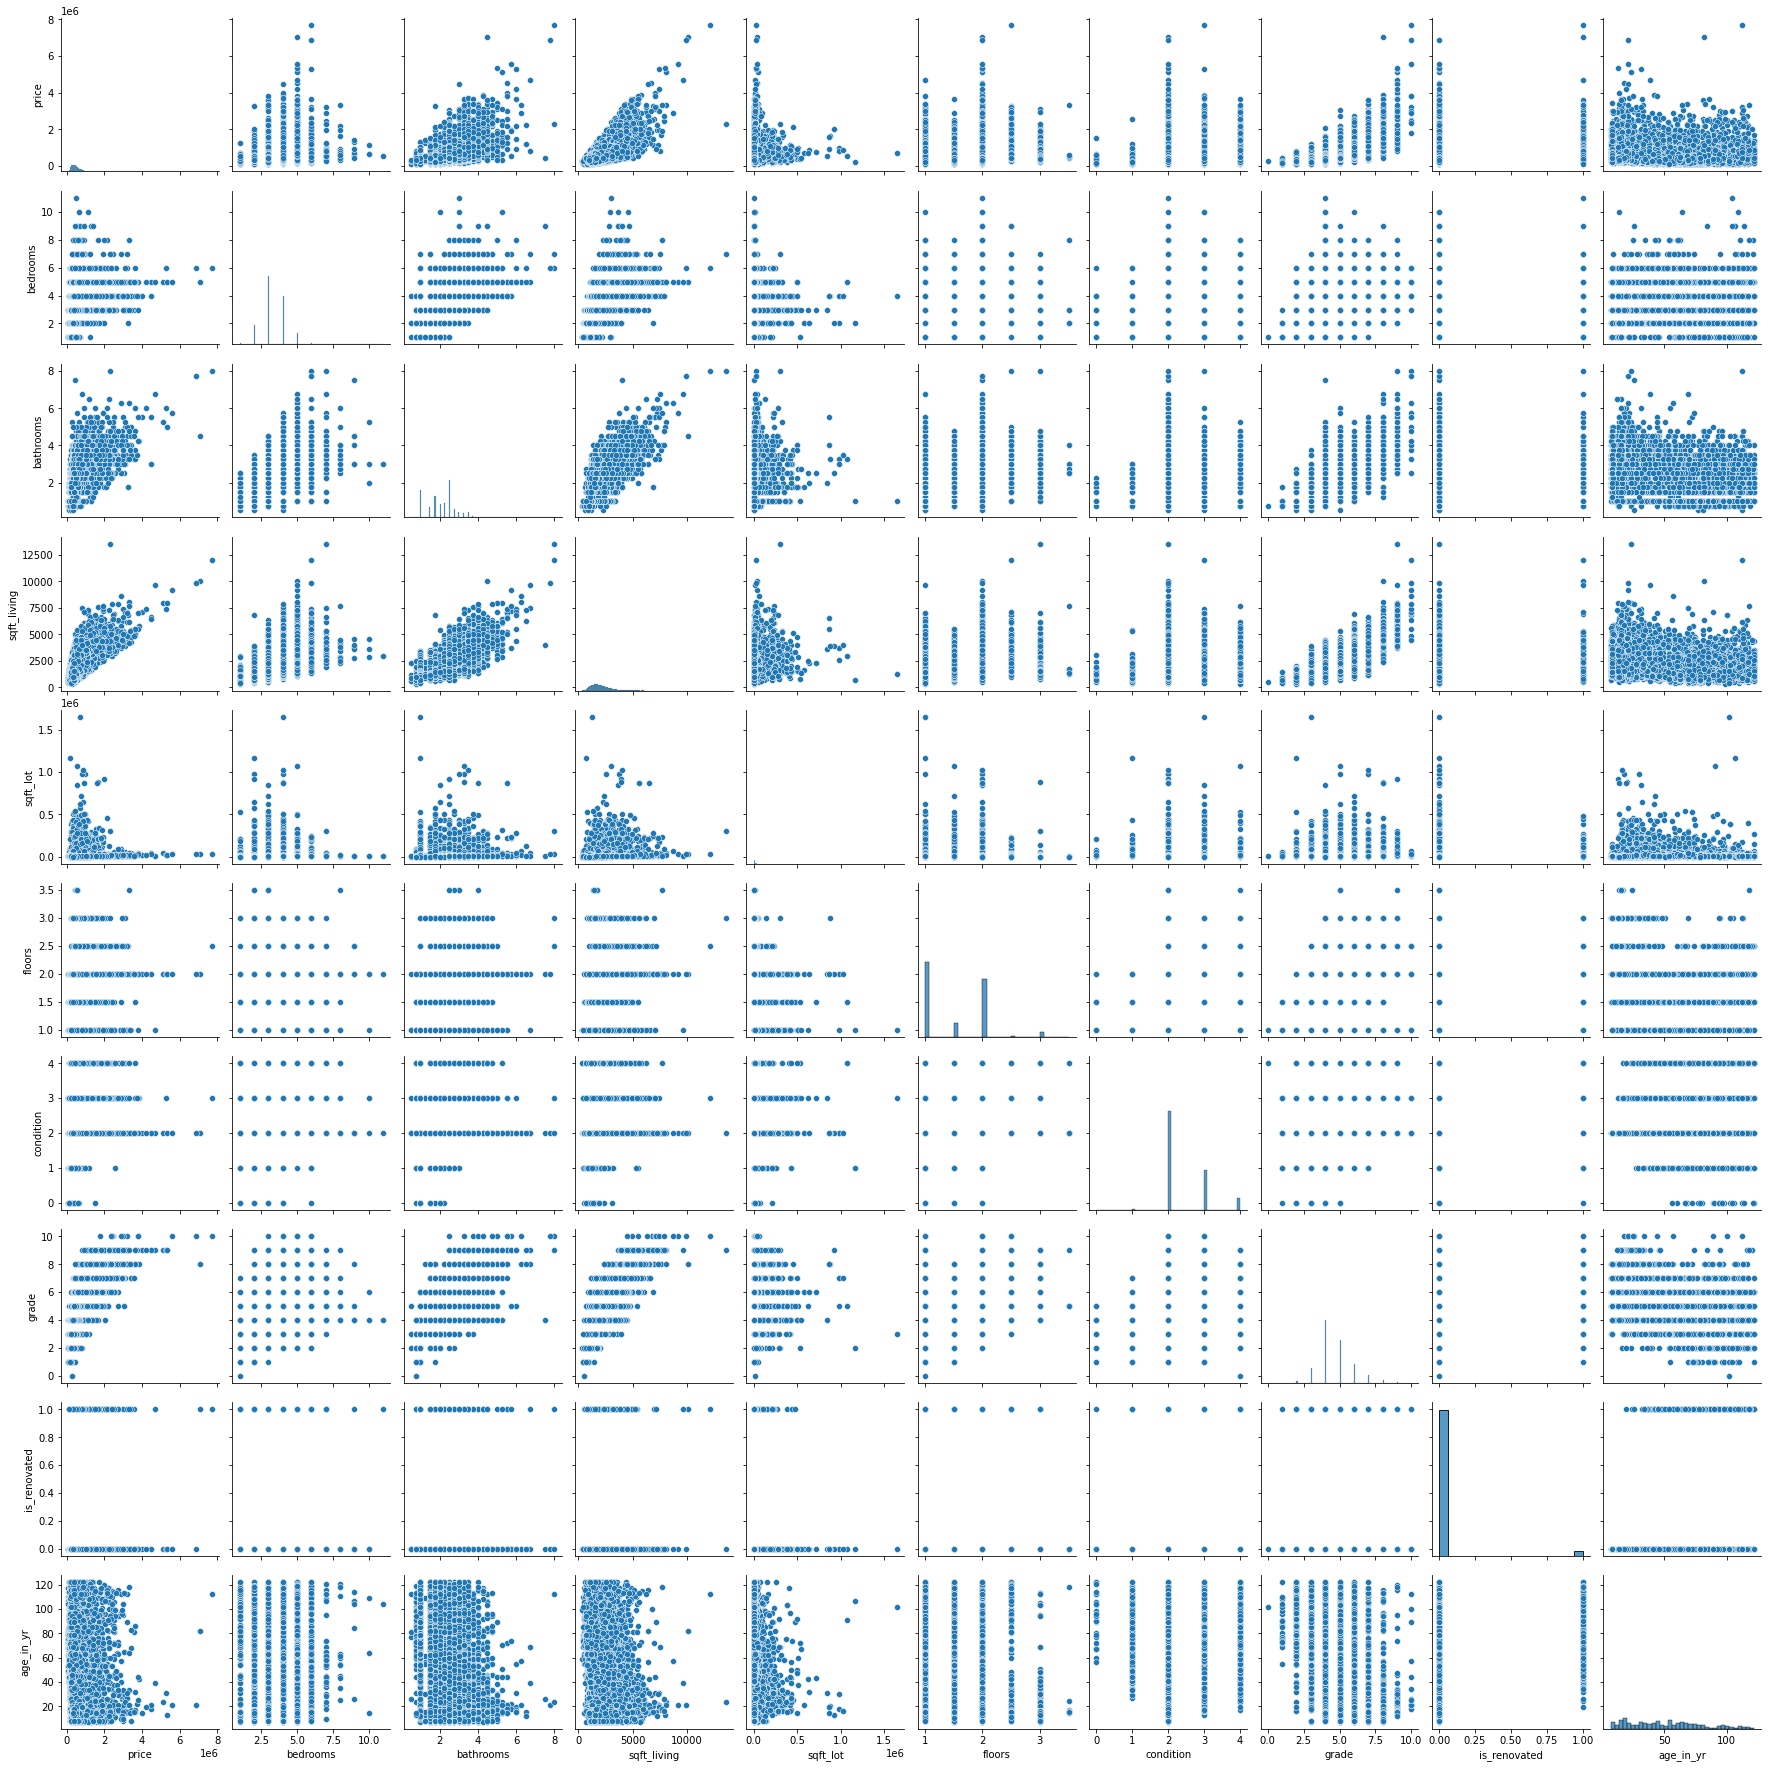

In [43]:
# Graph pairplots to determine linearity
sns.pairplot(df);

Looking at the pairplots the features with the strongest linear releationships with price seem to be grade, bathrooms, sqft_living, sqft_lot, grade. However there seem to be outliers for all three charts.

## Homoscedasticity
Homoscedasticity is the third assumption necessary when creating a linear regression model. By plotting the residuals versus the predicted y value it can be determined whether the null hypothesis can be rejeceted.

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


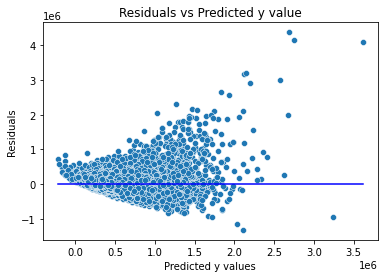

In [44]:
# Homoscedasticity
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')

p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue')
p = plt.title('Residuals vs Predicted y value')

In [45]:
#Goldfeld Quandt Test
name = ['F statistic', 'p-value']


test = sms.het_goldfeldquandt(residuals, predictors_int)
lzip(name, test)

[('F statistic', 0.9040842280286595), ('p-value', 0.9999999176855394)]

Here our p-value is 0.999 much greater than 0.05. This means we are able to reject the null hypothesis which states our error terms are homoscedastic.

This further validates the assumptions of linearity since the residuals appear to be heterodascitic.

## Normality

An assumption for linear regression is that residuals are normally distributed. This normality can be seen in a histogram as well as the skew of the data. 

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


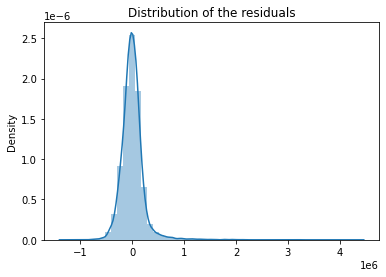

In [46]:
# check for normality among the residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of the residuals')

In [47]:
# create mean and standard deviation
mu, std = stats.norm.fit(residuals)
mu, std

(2.654348252332613e-07, 226649.63510965536)

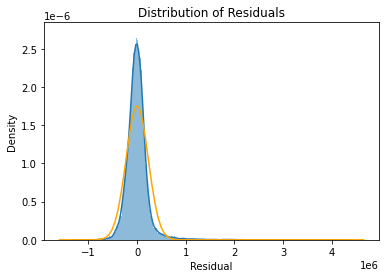

In [48]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=residuals, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of Residuals", xlabel="Residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


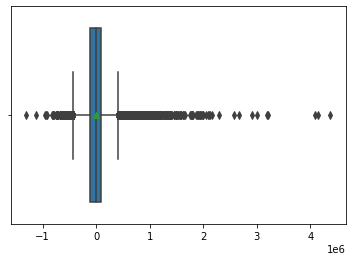

In [49]:
# view boxplot of residuals
sns.boxplot(residuals, showmeans=True);

## QQ Plot

The QQ plot is another way to visually confirm if the a given distribution belongs to a normal distribution.

/var/folders/n7/k7pk0gjj0rz19t5ylpv09t2w0000gn/T/ipykernel_3400/71005739.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


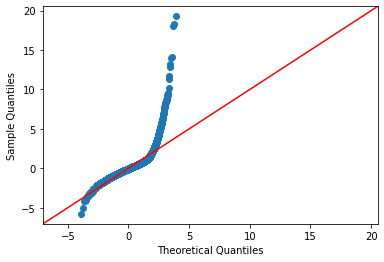

In [50]:
# create a Q-Q plot of the residuals
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

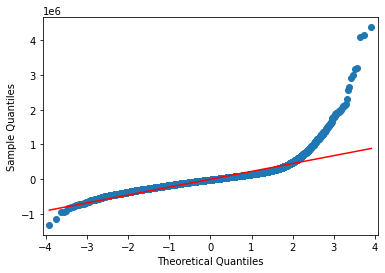

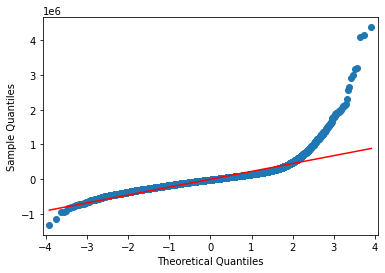

In [51]:
sm.qqplot(residuals, line ='s')

((array([-3.99686021, -3.78162805, -3.66389368, ...,  3.66389368,
          3.78162805,  3.99686021]),
  array([-1312764.32759548, -1131690.3932052 ,  -953782.50590185, ...,
          4089540.59514078,  4137956.24326883,  4371947.20652936])),
 (204227.71060597204, 2.655315483290704e-07, 0.9009118092451807))

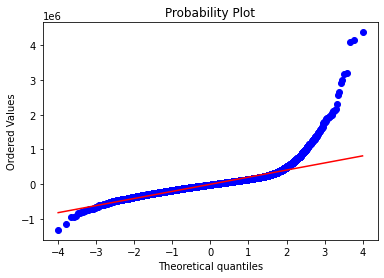

In [52]:
stats.probplot(residuals, dist="norm", plot=pylab)

This analysis of our first model shows that there are assumptions of linearity being violated. By removing outliers, it will be seen if the quality of the model can be improved. 

## Model Two: Removing Price Outliers

For this second model, all outliers from all features will be removed from the data to improve statistical accuracy of the model

In [53]:
#Remove outliers
# IQR

df2 = df.copy()

Q1 = np.percentile(df['price'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['price'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['price'] >= (Q3+1*IQR))
# Lower bound
lower = np.where(df['price'] <= (Q1-1*IQR))
 
''' Removing the Outliers '''
df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)
 
print("New Shape: ", df2.shape)

Old Shape:  (21597, 10)
New Shape:  (19940, 10)


In [54]:
predictors = df2.drop(['price'], axis=1)
predictors_int = sm.add_constant(predictors)

model2 = sm.OLS(df2['price'],predictors_int).fit()

In [55]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     2509.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:54:50   Log-Likelihood:            -2.6316e+05
No. Observations:               19940   AIC:                         5.263e+05
Df Residuals:                   19930   BIC:                         5.264e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.553e+05   8153.135    -43.574      0.000   -3.71e+05   -3.39e+05
bedrooms     -1.628e+04   1367.164    -11.907      0.000    -1.9e+04   -1.36e+04
bathrooms     2.851e+04   2239.278     12.732      0.000    2.41e+04    3.29e+04
sqft_living     84.9694      2.274     37.372      0.000      80.513      89.426
sqft_lot         0.0472      0.024      1.964      0.050       0.000       0.094
floors        3.659e+04   2182.507     16.766      0.000    3.23e+04    4.09e+04
condition     1.554e+04   1566.962      9.916      0.000    1.25e+04    1.86e+04
grade         9.498e+04   1420.517     66.863      0.000    9.22e+04    9.78e+04
is_renovated  1936.5221   5733.520      0.338      0.736   -9301.653    1.32e+04
age_in_yr     2548.3146     45.206     56.371      0.000    2459.707    2636.922
==============================================================================
Omnibus:                      408.777   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.152
Skew:                           0.315   Prob(JB):                    2.68e-101
Kurtosis:                       3.402   Cond. No.                     3.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the model summary there have been some impacts from the dropping of outlier values. The R-squared value has gone down from the previous model to 53.1 percent of the variation in the data being explained. The probability of the F statistic is still zero which allows us to still reject the null hypothesis that the interecept only model provides a better fit then the independent variables. However, the p-values of the features have all remained at zero except for is_renovated which went up to .736. This makes sense as is_renovated only has two potential values. Grade, Floors and bathrooms coefficent values have increased, while the coefficent value of sqft_living has decreased. We also see significant decreases in the skew and kurtosis which means the data is much more normally distributed. 

## Mean Absolute Error Model Two

In [56]:
# return predicted values from model
y_pred2 = model2.fittedvalues
# view predicted values
y_pred2

0        343259.329039
1        545801.911596
2        285989.542185
3        455839.051839
4        427801.756523
             ...      
21592    446106.434626
21593    446990.021214
21594    237596.785590
21595    428262.203285
21596    240132.174379
Length: 19940, dtype: float64

In [57]:
# true y value
y2 = df2["price"]

In [58]:
# return mean absolute error of model
mae_resid2 = np.mean(np.abs(y2 - y_pred2))
# view residuals from model
mae_resid2

103193.1004209157

The MSE of model two has gone down to 103193 USD on average. This is an improvement from our previous model.

## Coefficent Values of Model Two

In [59]:
model2.params

const          -355268.348365
bedrooms        -16278.890341
bathrooms        28509.806445
sqft_living         84.969411
sqft_lot             0.047174
floors           36592.961303
condition        15538.334544
grade            94979.348498
is_renovated      1936.522148
age_in_yr         2548.314586
dtype: float64

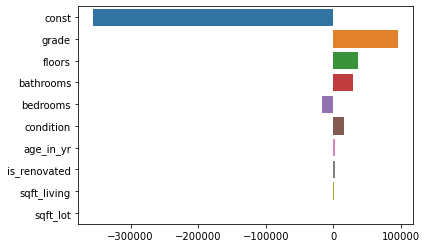

In [60]:
#creating tornadoe diagram of coefficent values
coeff2 = model2.params
coeff2 = coeff2.iloc[(coeff2.abs()*-1.0).argsort()]
sns.barplot(x=coeff2.values, y=coeff2.index, orient='h');

By using a tornadoe diagram, the changes in the coefficents are more visually apparent. That sqft_living as a coefficent value has decreased so much is surprising.

## Assumptions of Linearity Model Two

## Linearity Model Two

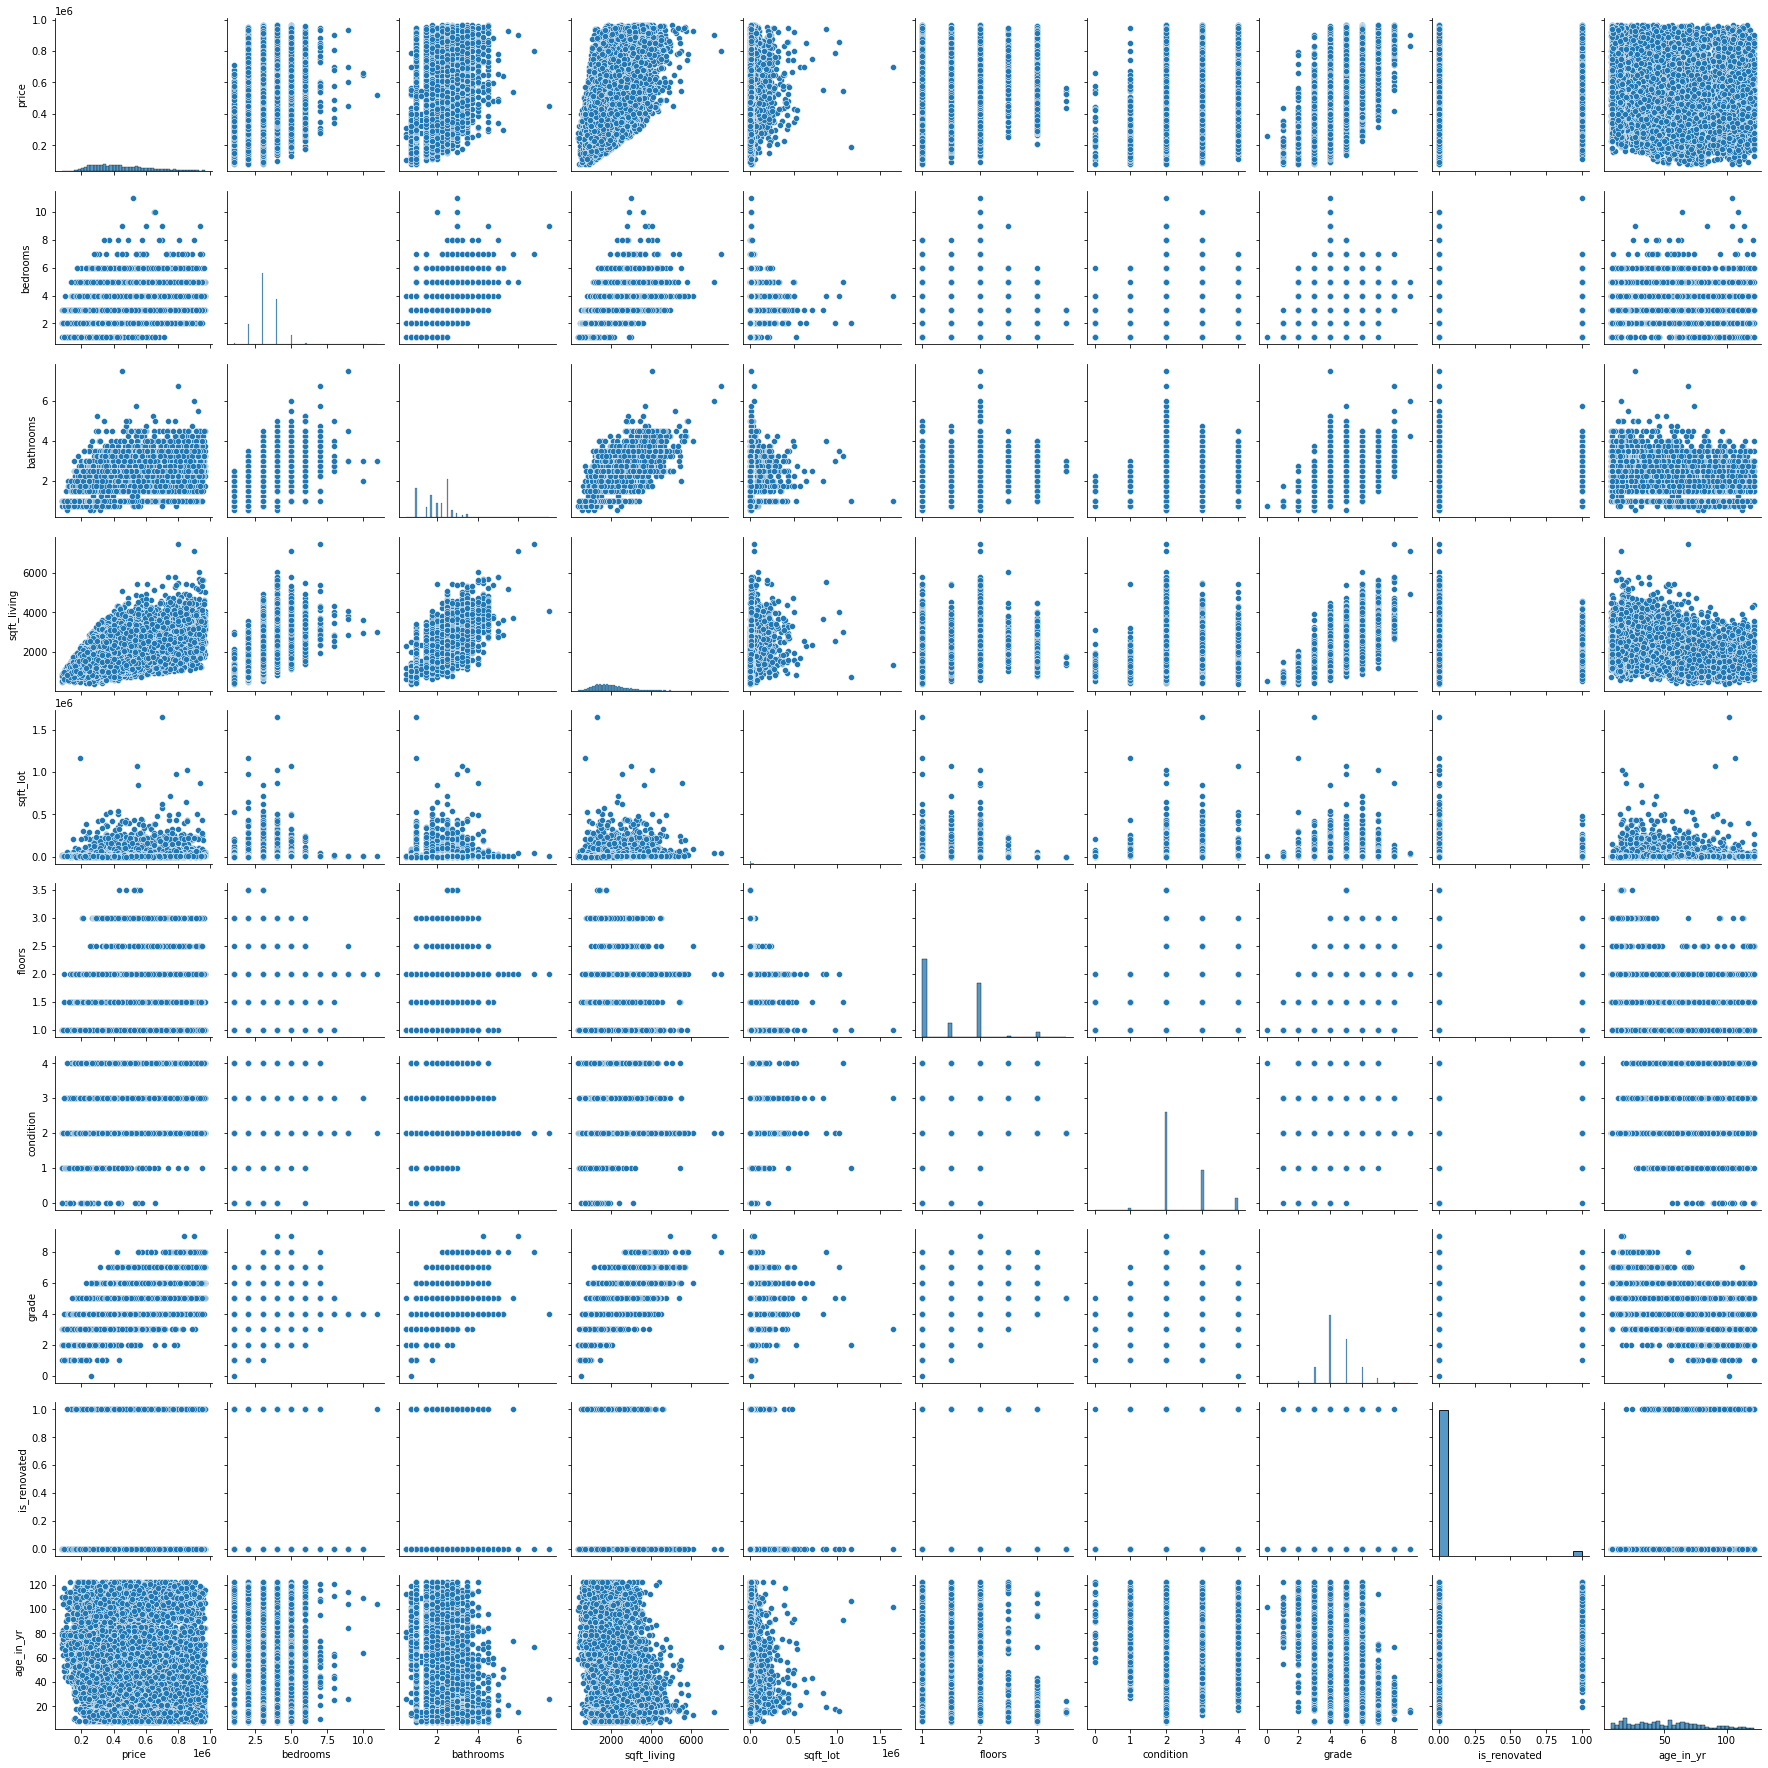

In [61]:
# Graph pairplots to determine linearity
sns.pairplot(df2);

Of all the features, looking at the pairplots, it still seems that bathrooms, sqft_living, and sqft_lot are the most linear relationship. However, removing outliers seems to have decreased the linearity of those three features. Grade seems to have retained it's linearity without the outliers.

## Homoscedasticity Model Two

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


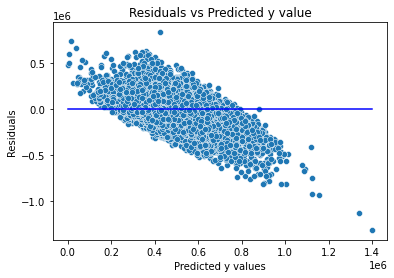

In [62]:
# Homoscedasticity
p2 = sns.scatterplot(y_pred2,residuals)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')

p2 = sns.lineplot([y_pred2.min(),y_pred2.max()],[0,0],color='blue')
p2 = plt.title('Residuals vs Predicted y value')

Again, the distributition of the data seems to follow a specific pattern and does not support the assumption of Homoscedasticity.

## QQ Plots Model Two

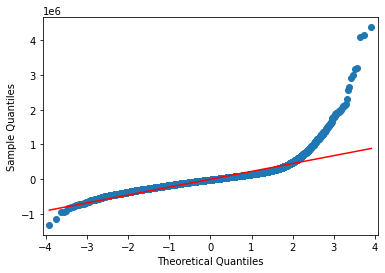

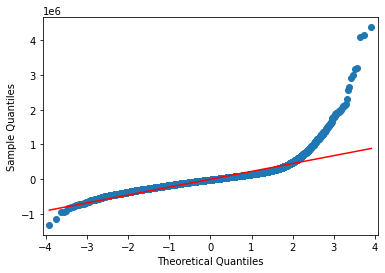

In [63]:
sm.qqplot(residuals, line ='s')

The positive from the outliers being eliminated has been that the data is much more normally distributed. This was also shown in the model summary with the skew and kurtosis values being much less then in the first model. However in the exploration of the assumptions of linearity the elimination of outliers has potentially affected the linearity of the relationship of the dependent variable with the independent variable. Next, a log form transformation will be used to improve the skew and kurtosis without affecting the linear relationship of the data.

## Model Three: Log Transform

From analyzing the results of our second model, the relative scale of the features seems to be the next logical area to explore. That bathrooms as a feature has more significant relationship with the depedendent rather then sqft_living seems unlikely. It also seems wise to drop sqft_lot and is_renovated since both had such a high p-value in model two. 

In [64]:
#dropping high p-value features sqft_lot and is_renovated
df = df.drop(['sqft_lot', 'is_renovated'], axis = 1)

In [65]:
#making a copy of database
df3 = df.copy()

In [66]:
#log transforming the price column
non_normal = ['price']
for feat in non_normal:
    df3[feat] = df3[feat].map(lambda x: np.log(x))

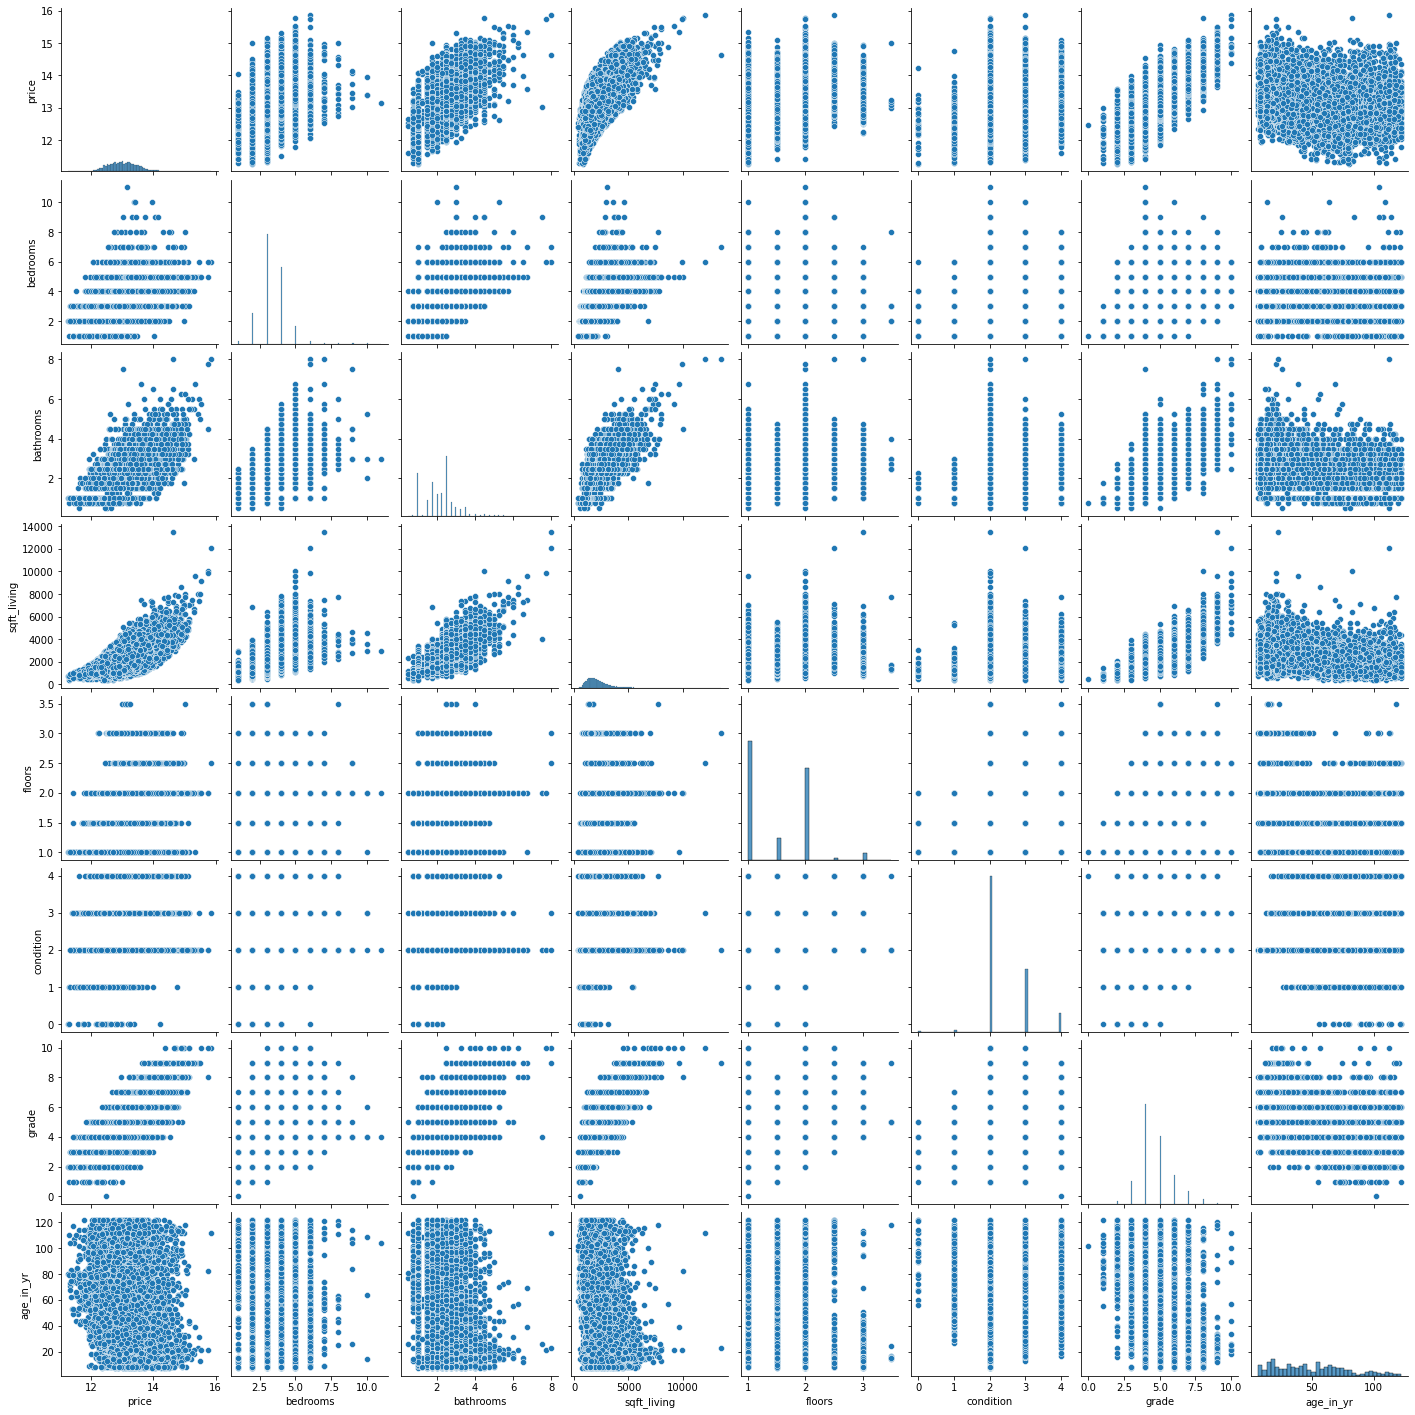

In [67]:
#checking pairplots for linearity
sns.pairplot(df3)

Looking at the plots of our most linear features (bathrooms, sqft_living, and grade), log transformation looks like it has retained the linear shape of the data. Hopefully this will be reflected in the model as well.

In [68]:
predictors3 = df3.drop(['price'], axis=1)
predictors_int3 = sm.add_constant(predictors3)

model3 = sm.OLS(df3['price'],predictors_int3).fit()

In [69]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     5363.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:55:09   Log-Likelihood:                -5911.6
No. Observations:               21597   AIC:                         1.184e+04
Df Residuals:                   21589   BIC:                         1.190e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.9965      0.018    617.688      0.000      10.962      11.031
bedrooms       -0.0344      0.003    -11.159      0.000      -0.040      -0.028
bathrooms       0.0921      0.005     18.300      0.000       0.082       0.102
sqft_living     0.0002   4.76e-06     38.287      0.000       0.000       0.000
floors          0.0801      0.005     15.942      0.000       0.070       0.090
condition       0.0438      0.004     12.101      0.000       0.037       0.051
grade           0.2294      0.003     73.085      0.000       0.223       0.236
age_in_yr       0.0059   9.68e-05     60.836      0.000       0.006       0.006
==============================================================================
Omnibus:                       96.671   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.092
Skew:                          -0.076   Prob(JB):                     1.87e-27
Kurtosis:                       3.337   Cond. No.                     1.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The results of model three show some significant improvements. The R Squared value has improved from the first models initial R Squared Value of 61.9% and the skew and kurtosis values have been reduced significantly. The P-values of all the features remain at statistically significant values of zero. 

## Model 4: Normalization

For further exploration, the features will be normalized to see if this increases the quality of the model.

In [70]:
#examining the columns of the dataset
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'grade', 'age_in_yr'],
      dtype='object')

In [71]:
# Use min max scaling on dataset
minmax_scale = preprocessing.MinMaxScaler().fit(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade','floors','condition','age_in_yr']])
df_minmax = minmax_scale.transform(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade','floors','condition','age_in_yr']])

In [72]:
#examine new min max scaled dataset
df_minmax

array([[0.01887956, 0.2       , 0.06666667, ..., 0.        , 0.5       ,
        0.52173913],
       [0.06035161, 0.2       , 0.23333333, ..., 0.4       , 0.5       ,
        0.55652174],
       [0.01338231, 0.1       , 0.06666667, ..., 0.        , 0.5       ,
        0.71304348],
       ...,
       [0.04252178, 0.1       , 0.03333333, ..., 0.4       , 0.5       ,
        0.05217391],
       [0.04224613, 0.2       , 0.26666667, ..., 0.4       , 0.5       ,
        0.09565217],
       [0.03240619, 0.1       , 0.03333333, ..., 0.4       , 0.5       ,
        0.06086957]])

In [73]:
#examine new min max dataset shape
df_minmax.shape

(21597, 8)

In [74]:
# creating a copy of the dataframe
df4 = df.copy()

In [75]:
#Combine min max dataset and copy of dataset
df4 = pd.concat([df4, pd.DataFrame(df_minmax)], axis=1)

In [76]:
#examine new combined dataset
df4.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,age_in_yr,0,1,2,3,4,5,6,7
0,221900.0,3,1.00,1180,1.0,2,4,67,0.018880,0.2,0.066667,0.061503,0.4,0.0,0.5,0.521739
1,538000.0,3,2.25,2570,2.0,2,4,71,0.060352,0.2,0.233333,0.167046,0.4,0.4,0.5,0.556522
2,180000.0,2,1.00,770,1.0,2,3,89,0.013382,0.1,0.066667,0.030372,0.3,0.0,0.5,0.713043
3,604000.0,4,3.00,1960,1.0,4,4,57,0.069011,0.3,0.333333,0.120729,0.4,0.0,1.0,0.434783
4,510000.0,3,2.00,1680,1.0,2,5,35,0.056678,0.2,0.200000,0.099468,0.5,0.0,0.5,0.243478


In [77]:
#drop old feature values
df4 = df4.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade','floors','condition','age_in_yr'], axis= 1)

In [78]:
#examine min max dataset
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21597 non-null  float64
 1   1       21597 non-null  float64
 2   2       21597 non-null  float64
 3   3       21597 non-null  float64
 4   4       21597 non-null  float64
 5   5       21597 non-null  float64
 6   6       21597 non-null  float64
 7   7       21597 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [79]:
#check for null values
df4.isna().any()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [80]:
df4.columns

Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='object')

In [81]:
#create predictors
predictors4 = df4.drop([0], axis=1)

# create model intercept
predictors_int4 = sm.add_constant(predictors4)

# fit model to data
model4 = sm.OLS(df4[0], predictors_int4).fit()

In [82]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     4991.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:55:09   Log-Likelihood:                 45241.
No. Observations:               21597   AIC:                        -9.047e+04
Df Residuals:                   21589   BIC:                        -9.040e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0874      0.001    -58.841      0.000      -0.090      -0.084
1             -0.0689      0.003    -23.855      0.000      -0.075      -0.063
2              0.0543      0.004     15.369      0.000       0.047       0.061
3              0.3221      0.006     54.943      0.000       0.311       0.334
4              0.1715      0.003     58.352      0.000       0.166       0.177
5              0.0074      0.001      6.287      0.000       0.005       0.010
6              0.0103      0.001      7.604      0.000       0.008       0.013
7              0.0609      0.001     58.399      0.000       0.059       0.063
==============================================================================
Omnibus:                    17269.696   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1209650.609
Skew:                           3.342   Prob(JB):                         0.00
Kurtosis:                      39.050   Cond. No.                         44.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using normalization on the features improved the R Squared value, however skew and kurtosis does not seem to have been decreased as much as using a log form transformation. One more feature transformation will be explored. 

## Model 5: Standard Scaling

In [83]:
#examining the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   floors       21597 non-null  float64
 5   condition    21597 non-null  int8   
 6   grade        21597 non-null  int8   
 7   age_in_yr    21597 non-null  int64  
dtypes: float64(3), int64(3), int8(2)
memory usage: 1.0 MB


In [84]:
# Scale features in dataframe
std_scale = preprocessing.StandardScaler().fit(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade','floors','condition','age_in_yr']])
df_std = std_scale.transform(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade','floors','condition','age_in_yr']])

In [85]:
# create a copy of dataframe
df5 = df.copy()

# drop old columns
df5 = df5.drop(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade','floors','condition','age_in_yr'], axis=1)

In [86]:
df_std

array([[-0.86671627, -0.41126094, -1.45107268, ..., -0.91555234,
        -0.62998644,  0.54467809],
       [-0.00625157, -0.41126094,  0.17448579, ...,  0.93743087,
        -0.62998644,  0.68085037],
       [-0.98077344, -1.51736336, -1.45107268, ..., -0.91555234,
        -0.62998644,  1.29362563],
       ...,
       [-0.37618606, -1.51736336, -1.77618438, ...,  0.93743087,
        -0.62998644, -1.29364769],
       [-0.38190525, -0.41126094,  0.49959749, ...,  0.93743087,
        -0.62998644, -1.12343234],
       [-0.58606486, -1.51736336, -1.77618438, ...,  0.93743087,
        -0.62998644, -1.25960462]])

In [87]:
df_std.shape

(21597, 8)

In [88]:

#add NumPy matrix as new columns in DataFrame
df5 = pd.concat([df5, pd.DataFrame(df_std)], axis=1)

# view new DataFrame info
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21597 non-null  float64
 1   1       21597 non-null  float64
 2   2       21597 non-null  float64
 3   3       21597 non-null  float64
 4   4       21597 non-null  float64
 5   5       21597 non-null  float64
 6   6       21597 non-null  float64
 7   7       21597 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [89]:
#drop null values
df5 = df5.dropna()

In [90]:
# create predictors
predictors5 = df5.drop([0], axis=1)

# create model intercept
predictors_int5 = sm.add_constant(predictors5)

# fit model to data
model5 = sm.OLS(df5[0], predictors_int5).fit()


In [91]:
# view model results
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     4991.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:55:09   Log-Likelihood:                -20251.
No. Observations:               21597   AIC:                         4.052e+04
Df Residuals:                   21589   BIC:                         4.058e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.291e-17      0.004  -1.26e-14      1.000      -0.008       0.008
1             -0.1293      0.005    -23.855      0.000      -0.140      -0.119
2              0.1155      0.008     15.369      0.000       0.101       0.130
3              0.4659      0.008     54.943      0.000       0.449       0.483
4              0.4174      0.007     58.352      0.000       0.403       0.431
5              0.0331      0.005      6.287      0.000       0.023       0.043
6              0.0348      0.005      7.604      0.000       0.026       0.044
7              0.3226      0.006     58.399      0.000       0.312       0.333
==============================================================================
Omnibus:                    17269.696   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1209650.609
Skew:                           3.342   Prob(JB):                         0.00
Kurtosis:                      39.050   Cond. No.                         4.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Similar to model 4, standard scaling has failed to decrease the skew and kurtosis values. After using all three scaling methods, log form transformation appears to have been the most successful. 

## Model 3 Diagnostics

## Mean Absolute Error for Model 3

In [92]:
# calculating the root mean squared error.
# this will tell us how far off the model is from the predicted
# since, we have log-transformed the values, we will have to undo this to get the real-world values

MSE = round(mean_squared_error(y_true = np.exp(df3['price']), y_pred = np.exp(model3.fittedvalues)),2)
print(f'mean_squared_error = {MSE}')
RMSE = round(np.sqrt(MSE),2)
print(f'root_mean_squared_error = {RMSE}')

mean_squared_error = 68079443279.41
root_mean_squared_error = 260920.38


Based on the Root Mean Squared Value, the model will be off by an average of USD 260,920 when it comes to predicting the price of a house. 

## Linear Regression Assumptions of Model 3

## Linearity of Model 3

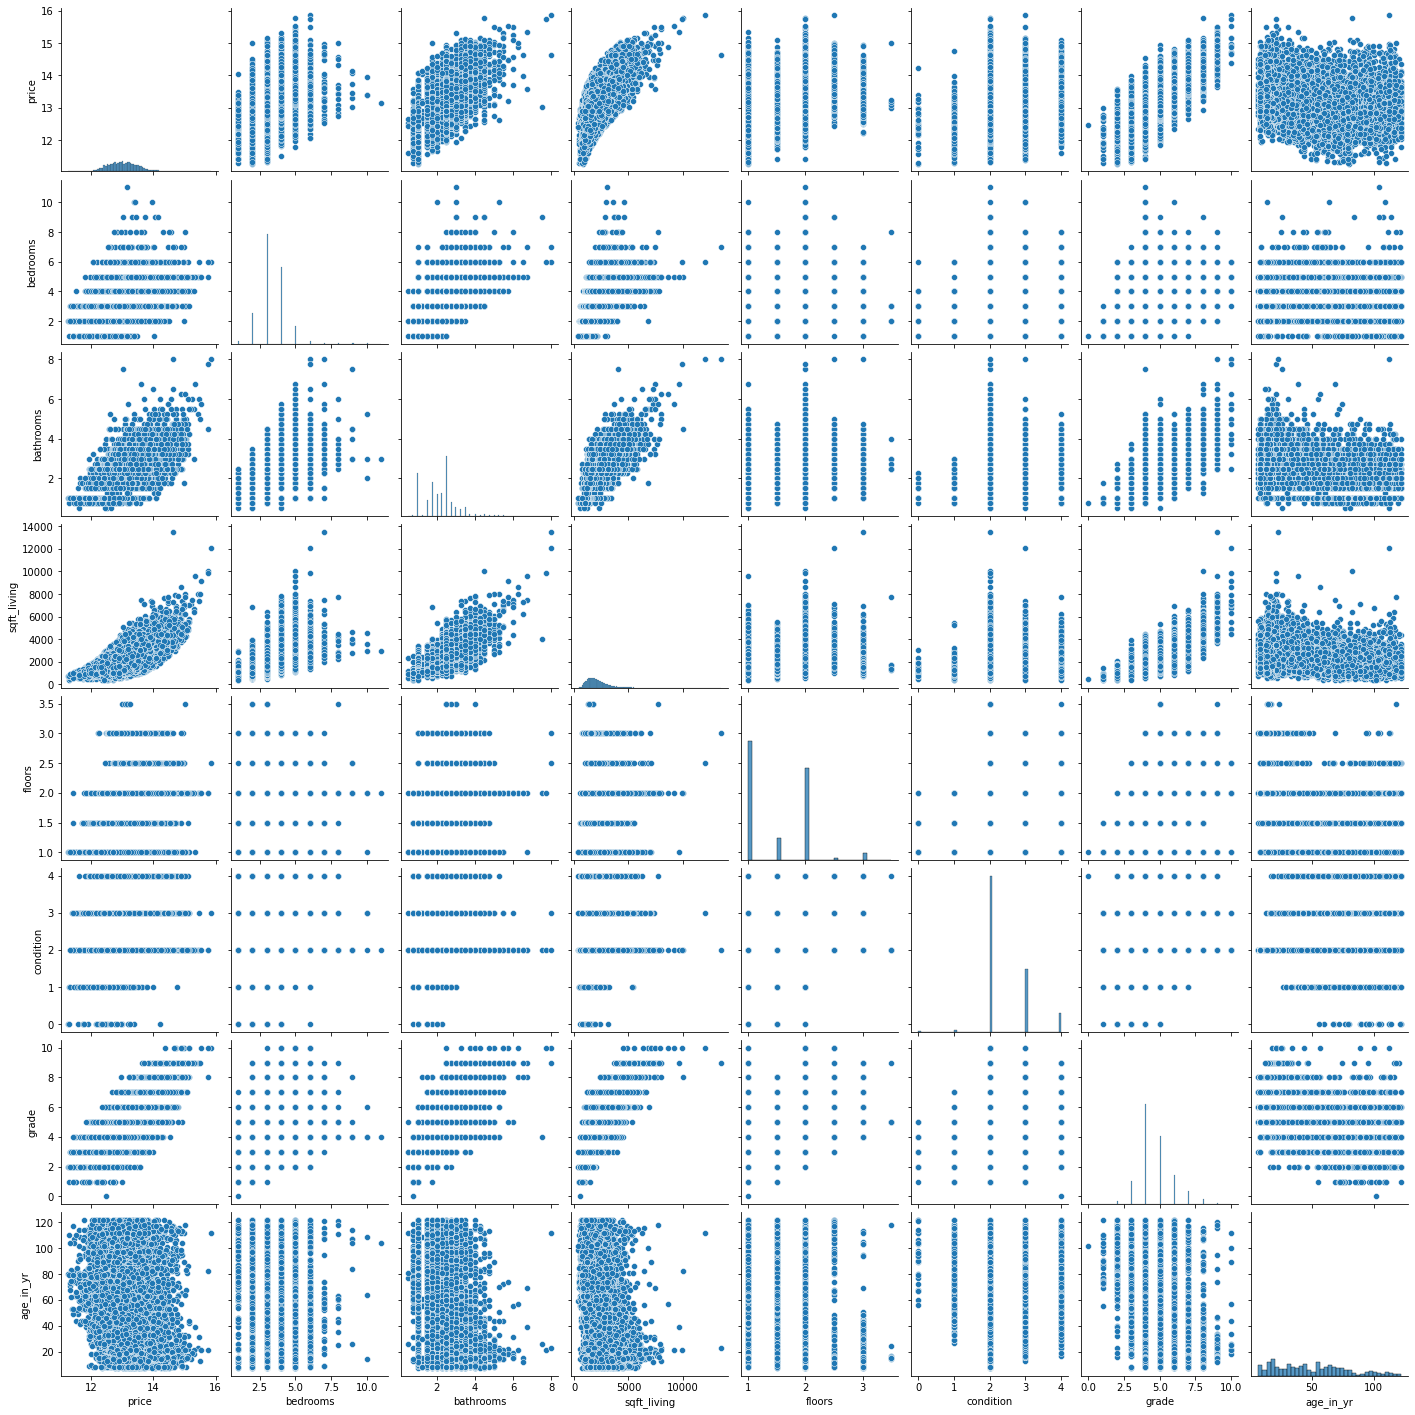

In [93]:
# Graph pairplots to determine linearity
sns.pairplot(df3);

Similar to previous models, the strongest linear relationships with price seems to remain to be bathrooms, sqft_living and grade. 

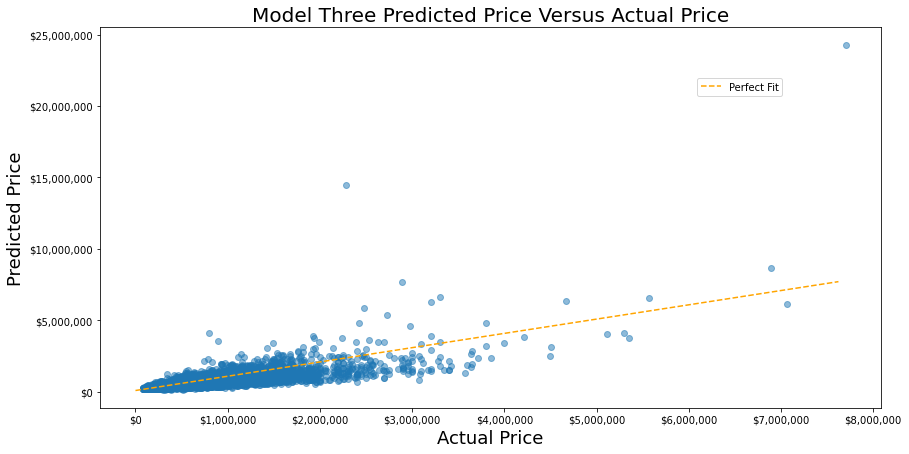

In [94]:
predicted_values = model3.fittedvalues
fig, ax = plt.subplots(figsize=(14,7),sharex=True,sharey=True)

perfect_line = np.arange(np.exp(df3['price']).min(), np.exp(df3['price']).max())
ax.scatter(np.exp(df3['price']), np.exp(predicted_values), alpha=0.5)
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.set_title('Model Three Predicted Price Versus Actual Price', fontsize= 20)
ax.set_xlabel("Actual Price", fontsize= 18)
ax.set_ylabel("Predicted Price", fontsize = 18)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.legend(loc='upper right', bbox_to_anchor=(.88,.88))

plt.savefig("Model3FittedValues.jpg");

## Homoscedasticity Model 3

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


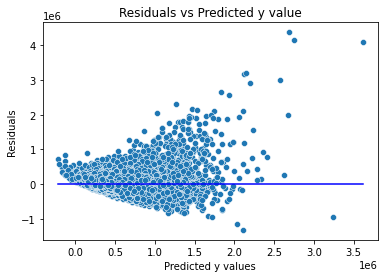

In [95]:
# Homoscedasticity
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')

p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color= 'blue')
p = plt.title('Residuals vs Predicted y value')
plt.savefig("Model3Homoscedasticity.jpg");

Similar to the models before, the distributition of the data seems to follow a specific pattern and does not support the assumption of Homoscedasticity.

## Distribution of the Model 3 Residuals

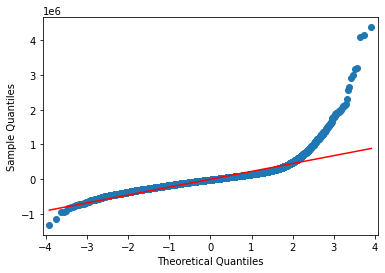

In [96]:
#QQ Plots
sm.qqplot(residuals, line='s')
plt.savefig("Model3QQPlot.jpg");

/Users/emilymarsh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


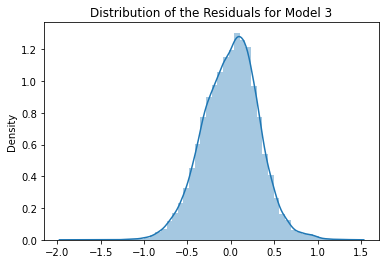

In [97]:
residuals = model3.resid
p = sns.distplot(residuals,kde=True)
p = plt.title('Distribution of the Residuals for Model 3')
plt.savefig("Model3Hist.jpg");

Though log form transformation has helped with the distribution of the residuals of the model, there are still violations of linear assumption occuring. This could be an indicator that a linear regression model is not appropriate for the statistical analysis of this dataset. 

## Model 3 Interpretation

Since the dependent variable of price was log transformed, the price value must be exponentiated to get the natrual values of each feature. 

## Factors Affecting Sale Price of a House

In [98]:
# bedrooms
percent_increase = round((np.exp(model3.params[1])-1)*100,2)
print(f'Expected precentage increase in the house value if the number of bedrooms is increased by 1  is {percent_increase}%')

Expected precentage increase in the house value if the number of bedrooms is increased by 1  is -3.38%


In [99]:
# bathroom
percent_increase = round((np.exp(model3.params[2])-1)*100,2)
print(f'Expected precentage increase in the house value if the number of bathrooms is increased by 1  is {percent_increase}%')

Expected precentage increase in the house value if the number of bathrooms is increased by 1  is 9.64%


In [100]:
# sqft_living
percent_increase = round((np.exp(model3.params[3])-1)*100,2)
print(f'Expected precentage increase in the house value if the square foot of living space is increased by 1  is {percent_increase}%')

Expected precentage increase in the house value if the square foot of living space is increased by 1  is 0.02%


In [101]:
# floors
percent_increase = round((np.exp(model3.params[4])-1)*100,2)
print(f'Expected precentage increase in the house value if the number of floors is increased by 1  is {percent_increase}%')

Expected precentage increase in the house value if the number of floors is increased by 1  is 8.34%


In [102]:
# condition
percent_increase = round((np.exp(model3.params[5])-1)*100,2)
print(f'Expected precentage increase in the house value if the condition is increased by 1  is {percent_increase}%')

Expected precentage increase in the house value if the condition is increased by 1  is 4.48%


In [103]:
# grade
percent_increase = round((np.exp(model3.params[6])-1)*100,2)
print(f'Expected precentage increase in the house value if the grade of the house is increased by 1  is {percent_increase}%')

Expected precentage increase in the house value if the grade of the house is increased by 1  is 25.79%


In [104]:
# age_in_yr
percent_increase = round((np.exp(model3.params[7])-1)*100,2)
print(f'Expected precentage increase in the house value if the age of the house is increased by 1  is {percent_increase}%')

Expected precentage increase in the house value if the age of the house is increased by 1  is 0.59%


The developed model has an error of **USD 260,920** when it comes to predicting the price of the house. 

A unit increase in the **grade** i.e materials that go into the building of the house will yield an increase of **25.79%**

By adding an extra **bathroom**, the sale price goes up by **9.64%**

By adding an extra **floor**, the sale price goes up by **8.34%**

## Conclusions

1. The model is not very accurate for this dataset. Not only is the error of the model very high, **USD 260,920**, but the assumptions of linearity are violated in this model. This indicates that another modeling technique may be more appropriate.

2. **Build quality**, **number of bathrooms**, and **number of floors** in a house are the most statistically significant factors when it comes to increasing the sale price of a house. 